<a href="https://colab.research.google.com/github/1900690/yolo-bbox-area-caliculate/blob/main/area_caliculate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#イチゴの大きさ検出器

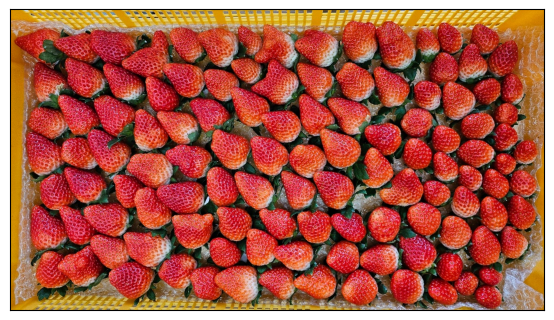

In [1]:
#@title 画像を取り込み { display-mode: "form" }
画像のアップロード方法を選択してください= 'サンプル画像で検出' #@param ["サンプル画像で検出", "画像をアップロード", "インカメラで画像を撮影", "アウトカメラで画像を撮影"]
#@markdown ※エラーが出た場合は、エラーが出なくなるまで実行し、カメラの許可を押してください

import os
import shutil
import datetime
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
from glob import glob
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import files



#表示用関数定義
def show_images_glob(images, figsize=(40,20), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(int(len(images) / columns + 1), columns, i + 1)
      plt.title(image[24:], loc='center',fontsize=20)
      plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False,bottom=False, left=False, right=False, top=False)
      plt.imshow(cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB))

#インカメラ用関数定義
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.facingMode ='user';
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#アウトカメラ用関数定義
def take_photo_out(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video:{facingMode:{exact:"environment"}}});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.facingMode ='environment';
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

if 画像のアップロード方法を選択してください== 'サンプル画像で検出':
    if os.path.exists('/content/photo.jpg'):
      os.remove('/content/photo.jpg')
    !wget -q https://github.com/1900690/yolo-bbox-area-caliculate/releases/download/strawberry_sample/itigo.jpg
    os.rename('/content/itigo.jpg','/content/photo.jpg')

    show_images_glob(['/content/photo.jpg'])


elif 画像のアップロード方法を選択してください== "画像をアップロード" :
    if os.path.exists('/content/photo.jpg'):
      os.remove('/content/photo.jpg')

    try:
      uploaded_file = files.upload()
      uploaded_file_name = next(iter(uploaded_file))
    except Exception as e:
      print(f"エラーが発生しました別の画像でお試しください エラーの内容:{e}")
    os.rename(uploaded_file_name,'/content/photo.jpg')

    show_images_glob(['/content/photo.jpg'])

elif 画像のアップロード方法を選択してください== 'インカメラで画像を撮影':

    %cd -q '/content'

    from IPython.display import Image
    try:
      filename = take_photo()
      #title=dt_now.strftime('%Y%m%d_%H%M%S_000')

      #print('Saved to {}'.format(title+".jpg"))

      # Show the image which was just taken.
      #display(Image(filename))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))

    show_images_glob(['/content/photo.jpg'])
else:

    %cd -q '/content'

    from IPython.display import Image
    try:
      filename = take_photo_out()
      #title=dt_now.strftime('%Y%m%d_%H%M%S_000')

      #print('Saved to {}'.format(title+".jpg"))

      # Show the image which was just taken.
      #display(Image(filename))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      #print(str(err))
      print("")
    if not os.path.exists('/content/photo.jpg'):
        print("アウトカメラがありません")
    else:
      show_images_glob(['/content/photo.jpg'])


0: 384x640 113 strawberrys, 3219.1ms
Speed: 5.1ms preprocess, 3219.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


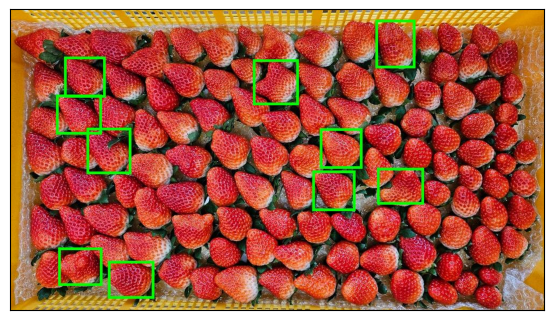

In [4]:
#@title 大きいほうから選択した個数分だけマークを付ける
検出する個数は = '10' # @param ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
#@markdown ※検出を繰り返すと検出スピードが上がります
if not os.path.exists('/content/itigo.pt') :
  %pip -q install ultralytics  # install
from ultralytics import YOLO, checks, hub
from ultralytics.utils.plotting import Annotator
from ultralytics import YOLO
import cv2
import os
import tensorflow as tf
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import os
import shutil
import datetime
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
from glob import glob
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import files

#表示用関数定義
def show_images_glob(images, figsize=(40,20), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(int(len(images) / columns + 1), columns, i + 1)
      plt.title(image[24:], loc='center',fontsize=20)
      plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False,bottom=False, left=False, right=False, top=False)
      plt.imshow(cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB))

if not os.path.exists('/content/itigo.pt'):
  !wget -q  https://github.com/1900690/yolo-bbox-area-caliculate/releases/download/strawberry_sample/itigo.pt

model = YOLO('/content/itigo.pt')  # ★モデルを指定

if os.path.exists('/content/detect.txt'):
  os.remove('/content/detect.txt')
if os.path.exists('/content/myfile.txt'):
  os.remove('/content/myfile.txt')
if os.path.exists('/content/pickup.txt'):
  os.remove('/content/pickup.txt')

imgname='/content/photo.jpg'#★検出画像を指定

# Process the image
source = cv2.imread(imgname)
results = model(source,conf=0.25,iou=0.45)

# Extract results
annotator = Annotator(source, example=model.names)

for box in results[0].boxes.xyxy.cpu():
    width, height, area = annotator.get_bbox_dimension(box)
    datalist = [str(box[0].item())," ",str(box[1].item())," ",str(box[2].item())," ",str(box[3].item())," ",str(area.item()),"\n"]
    f = open('/content/myfile.txt', 'a')
    f.writelines(datalist)
    f.close()

#計算する座標データを読み込み
txt_file = pd.read_csv("/content/myfile.txt",header=None, sep=" ")
#大きいほうから〇個分を抽出
pickup_file=txt_file.nlargest(int(検出する個数は), columns=4)#★検出個数を指定
# テキスト形式で出力
pickup_file.to_csv('/content/pickup.txt',header=False, index=False, sep=" ")

#書き込む画像を読み込み
im_original = Image.open(imgname)
image_height,image_width=np.array(im_original).shape[:2]

#書き込む座標データを読み込み
txt_file = pd.read_csv("/content/pickup.txt",header=None, sep=" ")
for annotation in range(len(txt_file)):
  draw = ImageDraw.Draw(im_original)
  x1=txt_file[0][annotation]
  y1=txt_file[1][annotation]
  x2=txt_file[2][annotation]
  y2=txt_file[3][annotation]
  draw.rectangle((x1, y1, x2, y2), outline=(0, 255, 0), width=5)

  im_original.save('/content/photo_count.jpg')

show_images_glob(['/content/photo_count.jpg'])